Table data: 
    Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Composition: 
 (1372, 5)

Confusion Matrix: 
 [[151   4]
 [  8 112]]


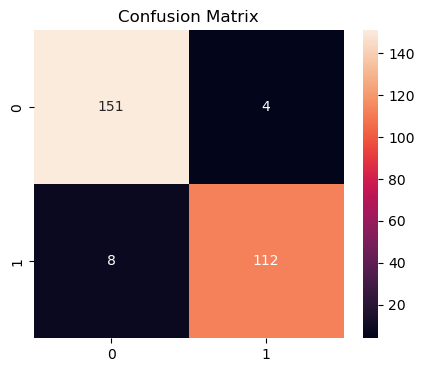


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       155
           1       0.97      0.93      0.95       120

    accuracy                           0.96       275
   macro avg       0.96      0.95      0.96       275
weighted avg       0.96      0.96      0.96       275

Decision Tree created from bank notes authenticity data set:


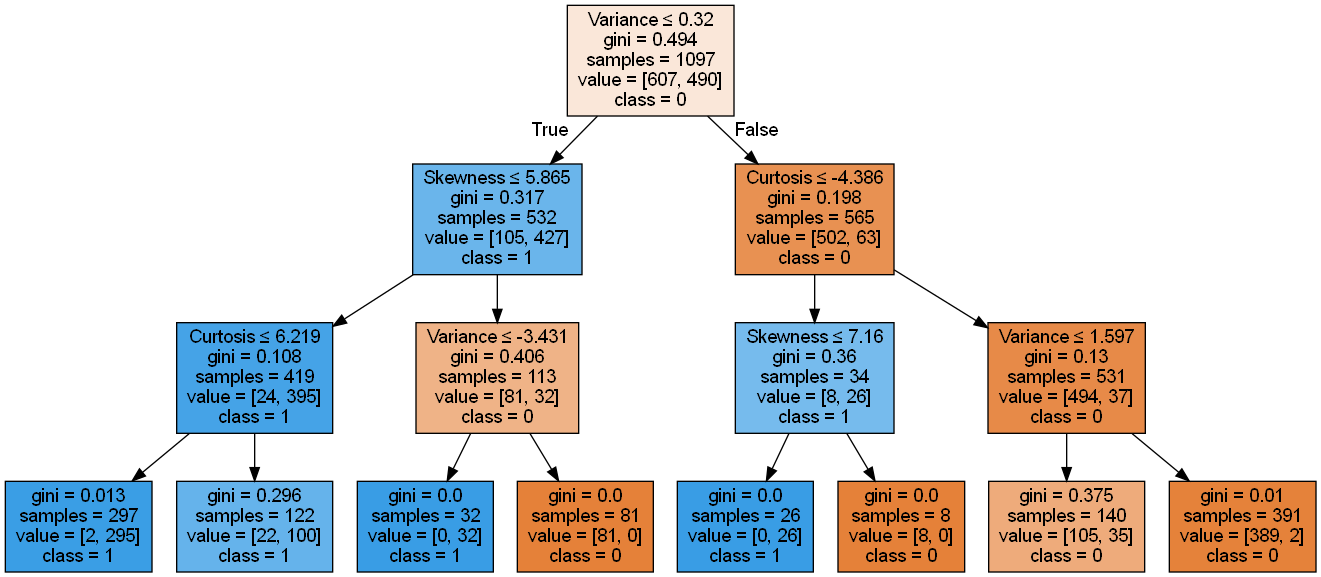

In [2]:
# Decision Tree algorithm

# The program aims to identify the authenticity of bank notes based on 
# certain features from wavelet transformed images of bills
# The feature include: variance, skewness, curtosis and entropy.
# variance refers to the statistical variance of the image
# skewness tells us how the data is shaped or distributed , could be
# positive (towards higher values), or negative (lower values)
# curtosis shows the shape of the distribution, how peaked or flat it is
# entropy: It quantifies the level of randomness or uncertainty in the data.
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
from IPython.display import Image
import seaborn as sns
# Load the dataset
bill_dataframe = pd.read_csv('bill_authentication.csv')
print("Table data: \n", bill_dataframe.head())
print("\nComposition: \n", bill_dataframe.shape)
# separating the features (input variables, x) and the target variable (y)
x=bill_dataframe.drop('Class', axis=1)
y=bill_dataframe['Class']
# Show the plot
plt.show()
# splitting the data into training and testing sets 
# with a random seed for reproducibility
x_train, x_test, y_train, y_test=train_test_split(x,y, 
                                                  train_size=0.8, 
                                                  test_size=0.2, 
                                                  random_state=50)
# creating the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=3)
# training the classifier using training data
classifier.fit(x_train, y_train)
# making predictions on the test data
y_pred=classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix: \n", cm)
# Create a heatmap of the confusion matrix
plt.figure(figsize = (5, 4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:\n",classification_report(y_test,y_pred))
# generating a DOT, used to describe and visualise 
# decision trees graph structure
decision_tree_dot = export_graphviz(classifier,
                                    feature_names=x.columns,
                                    class_names=['0', '1'], 
                                    special_characters=True, 
                                    rounded=False, filled=True)
# displaying the tree png file using Graphviz
graph = graphviz.Source(decision_tree_dot)
graph.render(filename="DecisionTree", format="png")
print("Decision Tree created from bank notes authenticity data set:")
Image(filename="DecisionTree.png")